# Redes Neuronales

## Modelo genérico de una neurona

![](https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png)

Este modelo genérico se muestra para entender que las **neuronas artificiales** son sobresimplificaciones
del verdadero objeto que es la _neurona biológica_. Pero la idea general es que una _neurona artificial_
tiene 3 componentes principales que se heredana de la _neurona biológica_:

1. **Dendritas**: Se puede entender en pocas palabras como la _entrada._

2. **Cuerpo celular**: Donde sucede _todo_ el procesamiento de datos.

3. **Axones**: La salida de la neurona, después de realizar todo el procesamiento en el _cuerpo celular_.

## Introducción

![](https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg)

Cada **neurona** toma valores de _entrada_ a través de sus _dendritas_ de diversas otras _neuronas_ (como se ve en la figura anterior)
y saca sus resultados a través de sus _axones_ hacia otras neuronas dentro de la **red.**

## Estructura general de una red neuronal

![](https://api.intechopen.com/media/chapter/39210/media/image14.jpeg)

Como se ve en la imagen, existen **tres capas** específicas en las **redes neuronales**

1. Capa de **entrada:** Aquí se reciben todos los datos, pueden ser los reales de entranmiento, prueba o como resultado de otras neuronas.
2. Capa(s) **oculta(s):** En estas capas se lleva a cabo todo el procesamiento de los datos, se reconocen patrones y características
   del conjunto de datos.
3. Capa de **salida:** Después de todo el procesamiento se devuelven los datos de toda la _red neuronal_ a través de esta capa de neuronas.

## Funcionamiento de una neurona

![](https://independentseminarblog.files.wordpress.com/2017/10/c8057-0ohlzxsodsebxw0ii.jpg?w=625)

Una *neurona* por sí misma tiene **3 componentes** principales:
1. **Entradas:** Los datos de entrada $x_1, x_2, \cdots ,x_N$ que se ingresan desde otras neuronas o como parte de la capa de *entrada* que se
   había mencionado anteriormente.
2. **Sesgos:** Cada valor de entrada contiene un valor de *sesgo*, un valor constante que funciona como valor de intersección. Siempre debe
   estar presente por cada valor de entrada y salida.
3. **Pesos:** Según la importancia de cada característica, cada valor de entrada debe tener un valor de *peso* que mida esta importancia,
   cada neurona tiene su propio conjunto de valores de peso.
4. **Salida**: La salida $a$ tiene for definición la siguiente *función*:
   $$ a = f \left( \sum_{i=0}^{N} w_i x_i \right) $$
   donde la función $f$ es conocida como **función de activación**.

## Funciones de activación

Existen diversas *funciones de activación*, depende fuertemente de cada conjunto de datos y del tipo de problema que se está realizando.
Aquí solamente se presentan dos, pero se debe revisar con más detalle la sección de referencias sobre *funciones de activación*.

### ReLU (Rectified Linear Unit)

La *función de activación* ReLU es **no diferenciable**  pero **continua**, tiene la siguiente forma

$$ f(x) = \max{\left( 0, x \right)} .$$

Definida en el 2000 por [Hahnloser et al.](https://www.nature.com/articles/35016072) ha sido la función de activación más prominente en los últimos
años dado que está fundamentada y sustendada por razones biológicas para un mejor entranamiento y asimilación de las características de los datos.

### Sigmoide (Logística)

Esta *función de activación* es **diferenciable**, **continua** y tiene un rango de valores entre $x \in [0, 1]$, está definida por la siguiente
función

$$ f(x) = \frac{1}{1 + e^{-x}} .$$

Esta función es muy popular entre los practicantes, profesionales e investigadores del aprendizaje inteligente dado que *no* tiene problemas por
la diferenciabilidad y da buenos resultados. Sin embargo, este tipo de funciones tienen algunas deventajas como *convergencia lenta*, *sesgo en el gradiente*,
entre otras cosas.

## Funciones de pérdida


## Entrenamiento y aprendizaje

El **entrenamiento y aprendizaje** de una *red neuronal* debe seguir un esquema semejante al mostrado aquí; es en realidad el **algoritmo** general que debe
cumplir toda *red neuronal* (existen otras formas de aprendizaje, ver las referencias para conocer más al respecto):

1. Tener una **estructura/arquitectura**, esto es, decidir cuántas *capas*, el tipo *función de activación* y el *ratio de aprendizaje.*
2. **Inicializar los pesos** de forma aleatoria; estos pesos irán cambiando conforme la *red neuronal* va aprendiendo.
3. Utilizar **propagación hacia adelante** para encontrar los datos de salida.
4. Usando la **función de pérdida** escogida encontrar los errores respecto a los *valores reales*.
5. Usando **propagación hacia atrás** ajustar los pesos dados los errores anteriormente calculados.
6. **Actualizar los pesos** para minimizar la *función de pérdida*.

## Ejemplo: Clasificación de *Iris*

In [204]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn import datasets, model_selection, preprocessing, metrics
import seaborn as sns
import pandas as pd

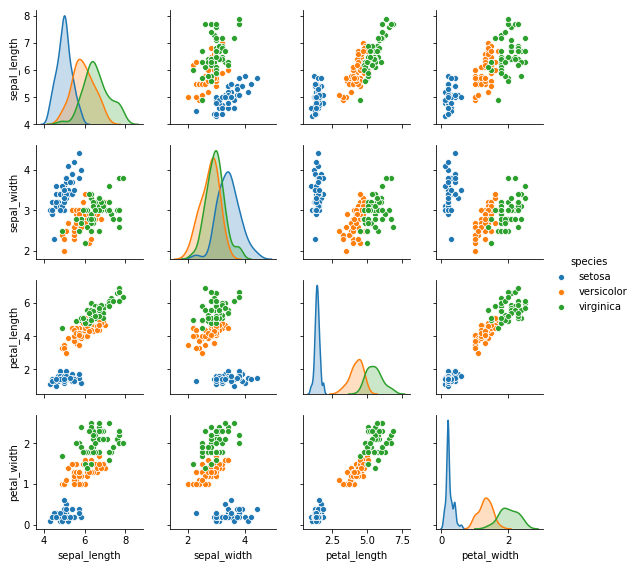

In [205]:
# Importar los datos y observar su estructura general
iris = sns.load_dataset("iris")
# Se pueden visualizar por pares de clases usando seaborn
sns.pairplot(iris, hue="species", height=2, diag_kind="kde")
plt.show()

In [206]:
# Para trabajar con este conjunto de datos, usaremos scikit learn
X, y = datasets.load_iris(return_X_y=True)
# Antes de separarlos, se normalizarán
X = preprocessing.normalize(X)
X = np.array(X).astype(np.float32)
# Transformar las clases a binario
trf = preprocessing.OneHotEncoder(sparse=False, categories="auto")
y = trf.fit_transform(y.reshape(-1, 1))
y = np.array(y).astype(np.int32)

In [207]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=26
)

In [208]:
# Declarar parámetro de TensorFlow
# Número de épocas o pasos de entrenamiento
pasos_entrenamiento = 10000
tam_lote = 50
ratio_aprendizaje = 0.005

La estructura general de la *red neuronal* será una de entrada, dos *capas ocultas* de 128 neuronas cada una, y una capa de salida.

In [209]:
# Numero de neuronas
n_capa_oculta = 15
# Número de atributos por cada clase
n_entrada = X.shape[1]
# Numero de clases por clasificar
n_clases = y.shape[1]
# n_clases = len(set(y_train))
# n_clases = 1

In [210]:
# Definir las entradas de la red neuronal
x_entrada = tf.placeholder(tf.float32, shape=[None, n_entrada])
y_entrada = tf.placeholder(tf.int32, shape=[None, n_clases])

Cada peso y sesgo debe de inicializarse aleatoriamente, para hacer esto más eficiente se utilizarán las estructuras
generales de Python.

In [211]:
# Diccionario de pesos
pesos = {
    "o1": tf.Variable(tf.random_normal([n_entrada, n_capa_oculta])),
    "o2": tf.Variable(tf.random_normal([n_capa_oculta, n_capa_oculta])),
    "salida": tf.Variable(tf.random_normal([n_capa_oculta, n_clases])),
}
# Diccionario de sesgos
sesgos = {
    "b1": tf.Variable(tf.random_normal([n_capa_oculta])),
    "b2": tf.Variable(tf.random_normal([n_capa_oculta])),
    "salida": tf.Variable(tf.random_normal([n_clases])),
}

Para realizar la propagación hacia adelante se creará una función donde se tengan todas las capas, y donde se
definirá por cada una su función de activación, que en este caso será ReLU.

In [212]:
def propagacion_adelante(x):
    # Capa oculta 1
    # Esto es la mismo que Ax + b, un modelo lineal
    capa_1 = tf.add(tf.matmul(x, pesos["o1"]), sesgos["b1"])
    # ReLU como función de activación
    capa_1 = tf.nn.relu(capa_1)
    # Capa oculta 1
    # Esto es la mismo que Ax + b, un modelo lineal
    capa_2 = tf.add(tf.matmul(capa_1, pesos["o2"]), sesgos["b2"])
    # ReLU como función de activación
    capa_2 = tf.nn.relu(capa_2)

    # Capa de salida
    # Nuevamente, un modelo lineal
    capa_salida = tf.add(tf.matmul(capa_2, pesos["salida"]), sesgos["salida"])
    capa_salida = tf.nn.softmax(capa_salida)

    return capa_salida

La salida del modelo, se aplica la propagación hacia adelante.

In [213]:
# Implementar el modelo y sus capas
y_prediccion = propagacion_adelante(x_entrada)

Ahora se debe implementar la propagación hacia atrás, pero para esto primero se necesita de una función de pérdida.
Como es un problema de clasificación, se utilizará softmax cross entropy.

In [214]:
f_costo = tf.reduce_mean(tf.losses.softmax_cross_entropy(y_entrada, y_prediccion))
optimizador = tf.train.AdamOptimizer(learning_rate=ratio_aprendizaje)
opt_entrenamiento = optimizador.minimize(f_costo)

Ahora solamente falta armar la red neuronal y realizar la clasificación.

In [215]:
# Primero, inicializar las variables
init = tf.global_variables_initializer()

In [216]:
# Función para evaluar la precisión de clasificación
def precision(prediccion, real):
    prediccion = tf.equal(tf.argmax(real, axis=1), tf.argmax(prediccion, axis=1))
    res_precision = tf.reduce_mean(tf.cast(prediccion, tf.float32))

    return tf.cast(res_precision, tf.float32)

In [217]:
kf = model_selection.KFold(n_splits=5)
kf_val_score_train = []
kf_val_score_test = []

In [218]:
# Crear un grafo de computación
with tf.Session() as sess:
    # Inicializar las variables
    sess.run(init)

    for tr_idx, ts_idx in kf.split(x_train):
        # Comenzar los pasos de entrenamiento
        for p in range(pasos_entrenamiento):
            # Minimizar la función de costo
            minimizacion = sess.run(
                opt_entrenamiento,
                feed_dict={x_entrada: x_train[tr_idx], y_entrada: y_train[tr_idx]},
            )
            if p % tam_lote == 0:
                prec_entramiento = sess.run(
                    precision(y_prediccion, y_entrada),
                    feed_dict={x_entrada: x_train[tr_idx], y_entrada: y_train[tr_idx]},
                )
                kf_val_score_train.append(prec_entramiento)
                prec_prueba = sess.run(
                    precision(y_prediccion, y_entrada),
                    feed_dict={x_entrada: x_train[ts_idx], y_entrada: y_train[ts_idx]},
                )
                kf_val_score_test.append(prec_prueba)
    # Prediccion final, una vez entrenado el modelo
    pred_final = sess.run(
        precision(y_prediccion, y_entrada),
        feed_dict={x_entrada: x_test, y_entrada: y_test},
    )
    pred_report = sess.run(y_prediccion, feed_dict={x_entrada: x_test})
    print("Precisión final: {0}".format(pred_final))

Precisión final: 0.9666666388511658


In [219]:
print(np.mean(kf_val_score_train))
print(np.mean(kf_val_score_test))

0.9660833
0.93754166


In [220]:
print(metrics.classification_report(
    trf.inverse_transform(y_test), trf.inverse_transform(pred_report)
))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        12

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Referencias

Introducción a las redes neuronales:

- [Fundamentals of Artificial Neural Networks, University of Waterloo](http://pami.uwaterloo.ca/~karray/Fundamentals_of_ANN.pdf)
- [Fundamentals of Neural Networks](https://www.analyticsvidhya.com/blog/2016/03/introduction-deep-learning-fundamentals-neural-networks/)

Funciones de activación:

- [Activation Functions](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0)
- [Comparison of activation functions](https://en.wikipedia.org/wiki/Activation_function#Comparison_of_activation_functions)
- [Activation Functions and its types](https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f)

Redes neuronales en `TensorFlow`:

- [Implementation of Neural Networks using TensorFlow](https://www.analyticsvidhya.com/blog/2016/10/an-introduction-to-implementing-neural-networks-using-tensorflow/)

Funciones de pérdida:

- [Cross-entropy loss](https://gombru.github.io/2018/05/23/cross_entropy_loss/)

Matemáticas de las Redes Neuronales:

- [Universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem)